# Trabalho de Cálculo Numérico
## Vítor Amorim Fróis
### 12543440

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Decomposição em Valores Singulares (SVD)

In [66]:
def check_symmetric(a, tol=1e-3):
    return np.all(np.abs(a-a.T) < tol)

In [67]:
def generate_simatrix():
  m = np.random.randint(0, 10, (3,3))
  while not check_symmetric(m):
    m = np.random.randint(0, 10, (3,3))
  return m.astype('double')

a) Escreva um código implementando o método de Francis usando a função `numpy.linalg.qr` para obter as decomposicoes QR necessárias.

In [68]:
def francis(A, tol=10e-10, steps=10000):
    n = np.shape(A)[0]
    B = np.copy(A)
    V = np.eye(n)
    erro = np.inf
    k = 0

    while erro > tol and k < steps:
        Q, R = np.linalg.qr(B)
        B = R @ Q
        V = V @ Q
        k += 1
        erro = np.max(np.abs(np.tril(B, -1)))

    B = np.diag(np.diag(B))

    return B,V

In [69]:
m = generate_simatrix()
m

array([[4., 8., 7.],
       [8., 9., 3.],
       [7., 3., 9.]])

In [70]:
b, v = francis(m)

In [71]:
np.round(v @ b @ v.T)

array([[4., 8., 7.],
       [8., 9., 3.],
       [7., 3., 9.]])

Decomposição SVD

In [72]:
_, U = francis(m @ m.T)
B2, V = francis(m.T @ m)
B = np.sqrt(B2)

In [73]:
print(U)
print(B)
print(V.T)

[[ 0.56920699  0.03383459 -0.82149779]
 [ 0.60230996  0.66296209  0.44463916]
 [ 0.55966608 -0.74788802  0.35698374]]
[[19.34791813  0.          0.        ]
 [ 0.          6.02398171  0.        ]
 [ 0.          0.          3.37189983]]
[[ 0.56920699  0.60230996  0.55966608]
 [ 0.03383459  0.66296209 -0.74788802]
 [-0.82149779  0.44463916  0.35698374]]


In [74]:
U @ B @ V.T

array([[ 8.55111139,  5.5366917 ,  5.02230416],
       [ 5.5366917 , 10.33327605,  4.07043624],
       [ 5.02230416,  4.07043624,  9.85941224]])

In [75]:
u @ s @ v

array([[  4.26609822,   2.69833037, -10.27226456],
       [  6.84447896,  -2.22565031,  -3.19367946],
       [  6.49233439,  -2.11704971,  -9.34706878]])

In [108]:
def my_svd(matrix: np.array, compressao):
  m, n = matrix.shape
  k = int(np.round((compressao * m * n) / (m + n + 1)))
  print("k = ", k)
  B2, U = francis(matrix@matrix.T)
  _, V = francis(matrix.T@matrix)
  B = np.sqrt(B2)
  Ak = U[:,:k] @ B[:k,:k] @ V.T[:k,:]
  return Ak

transform image

In [109]:
def grayscale(colors):
    """Return grayscale of given color."""
    r, g, b = colors
    return 0.21 * r + 0.72 * g + 0.07 * b

In [110]:
image = (plt.imread("dog.jpg"))
image = np.apply_along_axis(grayscale, 2, image)

In [111]:
compressao = 0.7
Ak_70 = my_svd(image, compressao)

k =  11


In [112]:
compressao = 0.5
Ak_50 = my_svd(image, compressao)

k =  8


[Text(0.5, 0, 'Compressão 50%')]

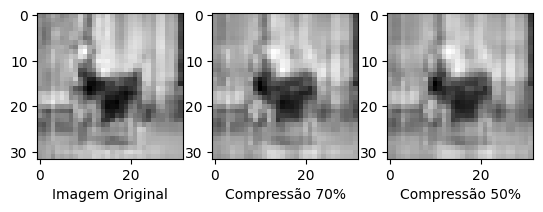

In [113]:
f, axarr = plt.subplots(1,3)

axarr[0].imshow(image, cmap='gray')
axarr[0].set(xlabel='Imagem Original')
axarr[1].imshow(Ak_70, cmap='gray')
axarr[1].set(xlabel='Compressão 70%')
axarr[2].imshow(Ak_50, cmap='gray')
axarr[2].set(xlabel='Compressão 50%')

Entre as 3 imagens pode ser observada uma pequena perda de resolução, mas ainda é possível comparar as imagens comprimidas com a original, valindo o método SVD para compressão.

# 2. Interpolação
$$f(t)=\frac{1}{1+25t^2}$$


$$x \in [-1,1]$$

a. Implemente Newton e Lagrange

In [82]:
f = lambda x: 1/(1+(25*(x**2)))

In [83]:
def lagrange_interp(xi,yi,x):
    n = np.size(xi); # maior dimensão de um vetor unidimensional
    m = np.size(x); # maior dimensão de um vetor unidimensional

    L = np.ones((n,m));

    for i in np.arange(n):
        for j in np.arange(n):
            if(i != j):
                L[i,:] = (L[i,:]*(x-xi[j]))/(xi[i]-xi[j]);

    y = yi.dot(L); # --> yi é vetor linha 1xn L é matriz nxm --> 1xm
    return y;

In [84]:
def newton_interp(xi,yi,x):
    n = np.size(xi); ni = np.size(x); N = np.ones((n,ni));
    D = np.zeros((n,n)); D[:,0] = yi;

    for j in np.arange(n-1): # matriz de diferenças divididas
        for i in np.arange(n-j-1):
            D[i,j+1] = (D[i+1,j]-D[i,j])/(xi[i+j+1]-xi[i]);

    for i in np.arange(1,n): # loop do produtório da forma de Newton
        N[i,:] = N[i-1,:]*(x-xi[i-1]);

    y = D[0,:].dot(N)

    return y

b. Usando 11 pontos no intervalo, calcule a plote as funções

In [85]:
xi = np.linspace(-1, 1, num=11, endpoint=True)
yi = f(xi)

x = np.linspace(-1, 1, num=100, endpoint=True)

lagrange_y = lagrange_interp(xi, yi, x)
newton_y = newton_interp(xi, yi, x)

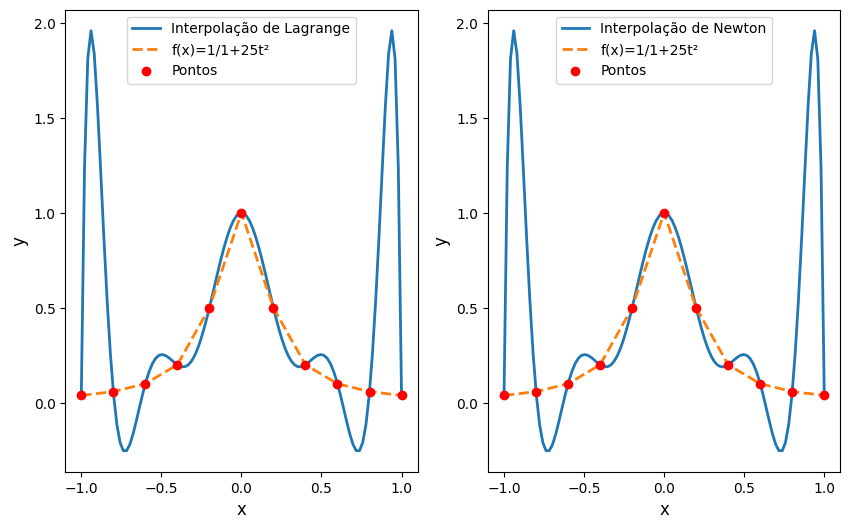

In [86]:
plt.figure(figsize=(10,6),facecolor='white')


plt.subplot(1, 2, 1)
plt.plot(x, lagrange_y, label = 'Interpolação de Lagrange',linewidth = 2,zorder=1)
plt.plot(xi, yi, label = 'f(x)=1/1+25t²',linewidth = 2,linestyle='--',zorder=2)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 1,facecolor='red',zorder=3)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(x, newton_y, label = 'Interpolação de Newton',linewidth = 2,zorder=1)
plt.plot(xi, yi, label = 'f(x)=1/1+25t²',linewidth = 2,linestyle='--',zorder=2)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 1,facecolor='red',zorder=3)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')

plt.legend()
plt.show()

c. Repita o processo, agora utilizando 21 pontos. O que houve?

In [87]:
xi = np.linspace(-1, 1, num=21, endpoint=True)
yi = f(xi)

x = np.linspace(-1, 1, num=100, endpoint=True)

lagrange_y = lagrange_interp(xi, yi, x)
newton_y = newton_interp(xi, yi, x)

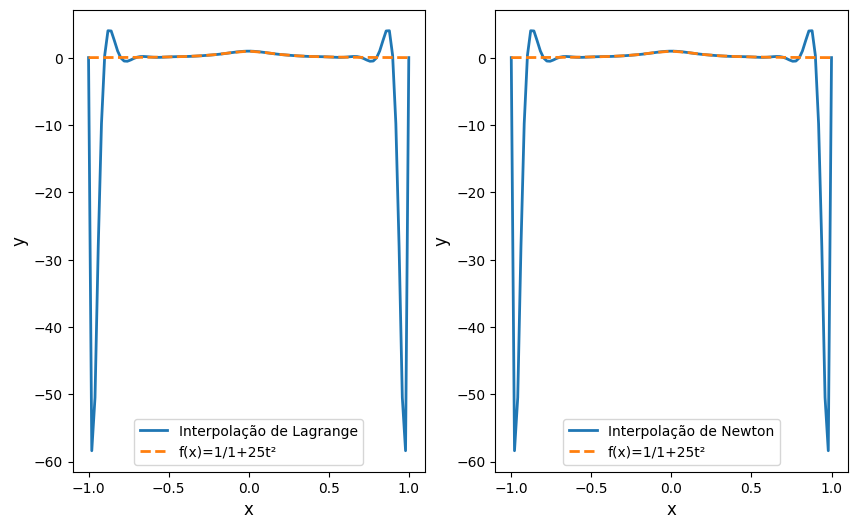

In [88]:
plt.figure(figsize=(10,6),facecolor='white')


plt.subplot(1, 2, 1)
plt.plot(x, lagrange_y, label = 'Interpolação de Lagrange',linewidth = 2,zorder=1)
plt.plot(xi, yi, label = 'f(x)=1/1+25t²',linewidth = 2,linestyle='--',zorder=2)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(x, newton_y, label = 'Interpolação de Newton',linewidth = 2,zorder=1)
plt.plot(xi, yi, label = 'f(x)=1/1+25t²',linewidth = 2,linestyle='--',zorder=2)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')

plt.legend()
plt.show()

Quando o grau do polinômio aumentou, a função desestabilizou.
Esse comportamento de interpolações é conhecido como **Fenômeno de Runge.**



*   Não há garantias que $P_n$ converge para $f$ quando $n → ∞$
*   Interpolacão polinomial de alta ordem é instável em uma
distribuição uniforme de nós.




d. Utilize a função ` scipy.interpolate.interp1d` para calcular interpolações cúbicas e lineares. Plote e compare com as soluções anteriores

In [89]:
import scipy

In [90]:
linear_f = scipy.interpolate.interp1d(xi, yi, kind='linear')
spline_f = scipy.interpolate.interp1d(xi, yi, kind='cubic')

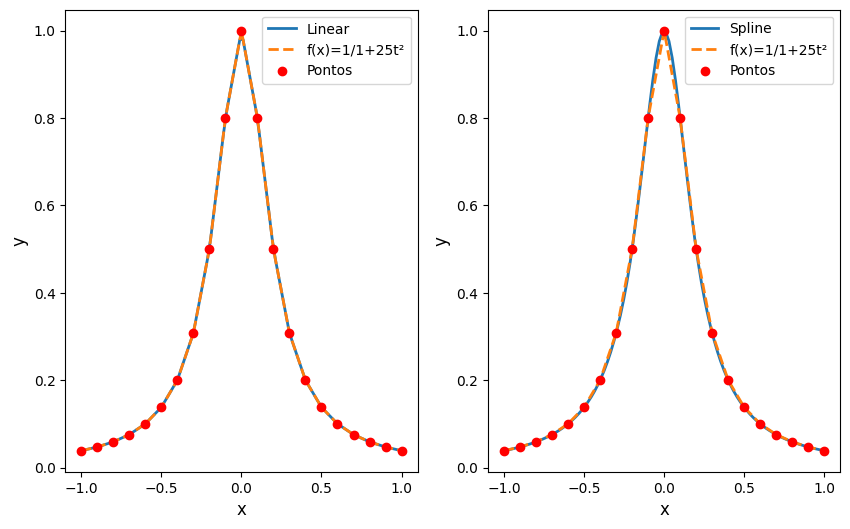

In [91]:
plt.figure(figsize=(10,6),facecolor='white')


plt.subplot(1, 2, 1)
plt.plot(x, linear_f(x), label = 'Linear',linewidth = 2,zorder=1)
plt.plot(xi, yi, label = 'f(x)=1/1+25t²',linewidth = 2,linestyle='--',zorder=2)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 1,facecolor='red',zorder=3)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(x, spline_f(x), label = 'Spline',linewidth = 2,zorder=1)
plt.plot(xi, yi, label = 'f(x)=1/1+25t²',linewidth = 2,linestyle='--',zorder=2)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 1,facecolor='red',zorder=3)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')

plt.legend()
plt.show()

Os resultados são bem parecidos com as funções de menor ordem interpoladas.
A função linear cobre bem a função original, porém não é derivável como a spline.

e. Repita os itens b. e c. com nós de Chebyshev

In [92]:
f = lambda x: 1/(1+(25*(x**2)))

n = 10
x = np.linspace(-1, 1, num=n+1, endpoint=True)
a = -1; b = 1

yi = f(xi)

x = np.linspace(-1, 1, num=100, endpoint=True)

lagrange_y = lagrange_interp(xi, yi, x)
newton_y = newton_interp(xi, yi, x)

xi = np.zeros(n+1);
i = np.arange(n+1);
xi = (a+b)/2 + (b-a)*np.cos((2*i+1)*np.pi/(2*(n+1)))/2
yi = 1/(1+25*xi**2);

lagrange_y = lagrange_interp(xi, yi, x)
newton_y = newton_interp(xi, yi, x)
print(xi, yi)

[ 9.89821442e-01  9.09631995e-01  7.55749574e-01  5.40640817e-01
  2.81732557e-01  2.83276945e-16 -2.81732557e-01 -5.40640817e-01
 -7.55749574e-01 -9.09631995e-01 -9.89821442e-01] [0.03922544 0.04611321 0.06544959 0.12037588 0.33508349 1.
 0.33508349 0.12037588 0.06544959 0.04611321 0.03922544]


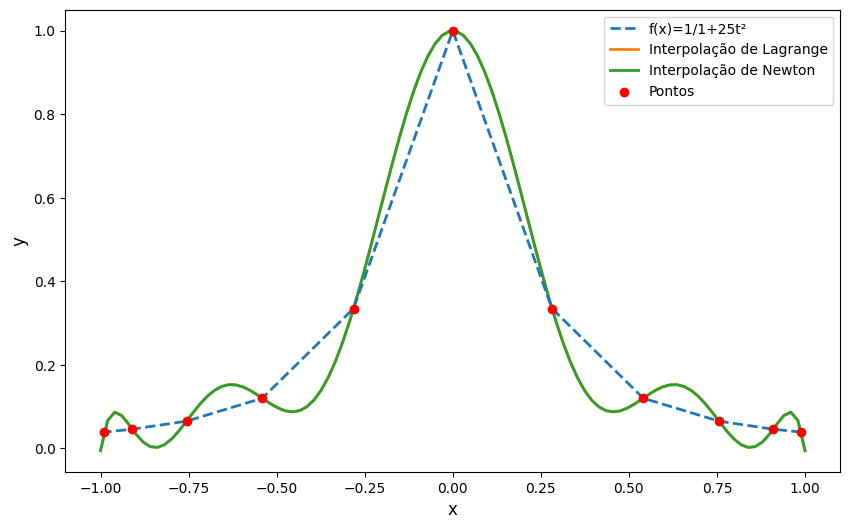

In [93]:
plt.figure(figsize=(10,6),facecolor='white')
plt.plot(xi, yi, label = 'f(x)=1/1+25t²',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x, lagrange_y, label = 'Interpolação de Lagrange',linewidth = 2,zorder=1)
plt.plot(x, newton_y, label = 'Interpolação de Newton',linewidth = 2,zorder=1)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 1,facecolor='red',zorder=3)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')

plt.legend()
plt.show()

In [94]:
f = lambda x: 1/(1+(25*(x**2)))

n = 20
x = np.linspace(-1, 1, num=n+1, endpoint=True)
a = -1; b = 1

yi = f(xi)

x = np.linspace(-1, 1, num=100, endpoint=True)

lagrange_y = lagrange_interp(xi, yi, x)
newton_y = newton_interp(xi, yi, x)

xi = np.zeros(n+1);
i = np.arange(n+1);
xi = (a+b)/2 + (b-a)*np.cos((2*i+1)*np.pi/(2*(n+1)))/2
yi = 1/(1+25*xi**2);

lagrange_y = lagrange_interp(xi, yi, x)
newton_y = newton_interp(xi, yi, x)
print(xi, yi)

[ 9.97203797e-01  9.74927912e-01  9.30873749e-01  8.66025404e-01
  7.81831482e-01  6.80172738e-01  5.63320058e-01  4.33883739e-01
  2.94755174e-01  1.49042266e-01  6.12323400e-17 -1.49042266e-01
 -2.94755174e-01 -4.33883739e-01 -5.63320058e-01 -6.80172738e-01
 -7.81831482e-01 -8.66025404e-01 -9.30873749e-01 -9.74927912e-01
 -9.97203797e-01] [0.03866918 0.04038428 0.0441245  0.05063291 0.06141936 0.07958062
 0.1119415  0.17524253 0.31525699 0.64294627 1.         0.64294627
 0.31525699 0.17524253 0.1119415  0.07958062 0.06141936 0.05063291
 0.0441245  0.04038428 0.03866918]


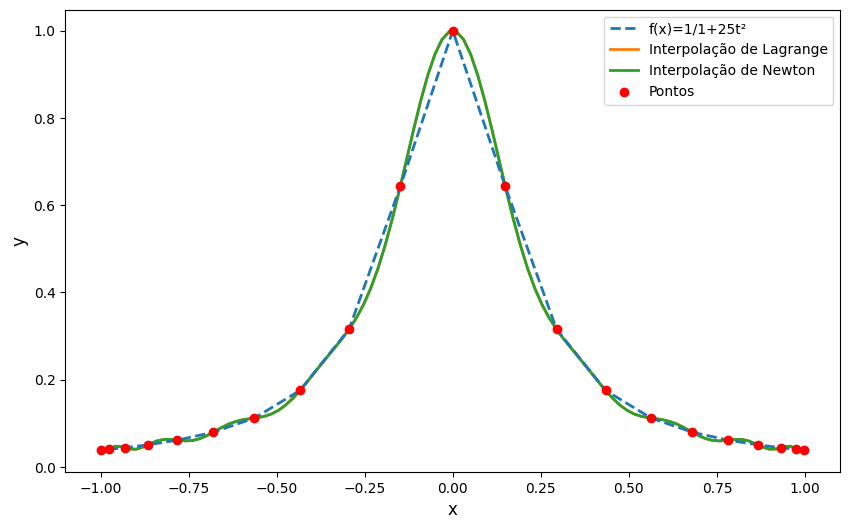

In [95]:
plt.figure(figsize=(10,6),facecolor='white')
plt.plot(xi, yi, label = 'f(x)=1/1+25t²',linewidth = 2,linestyle='--',zorder=2)
plt.plot(x, lagrange_y, label = 'Interpolação de Lagrange',linewidth = 2,zorder=1)
plt.plot(x, newton_y, label = 'Interpolação de Newton',linewidth = 2,zorder=1)
plt.scatter(xi,yi,label = 'Pontos',linewidth = 1,facecolor='red',zorder=3)
plt.xlabel('x',fontsize='large')
plt.ylabel('y',fontsize='large')

plt.legend()
plt.show()

Como visto na questão anterior, nós igualmente espaçados aumentam o erro. Assim, os nós de Chebyshev são uma maneira de calcular pontos que permitam melhores interpolações.

Nos gráficos, é possível observar que mesmo com 21 nós as interpolações calculadas se portam bem.

# 3. Mínimos Quadrados

In [96]:
def mmq(x, y, k):
  X = np.vander(x, k)
  A = X.T @ X
  b = X.T @ y
  a = np.linalg.solve(A, b)
  return a

In [97]:
def mmq_qr(x, y, k):
  X = np.vander(x, k)
  Q, R = np.linalg.qr(X)
  b = Q.T @ y
  a = np.linalg.solve(R, b)
  return a

b. Aproxime, via MMQ, os dados do arquivo .txt por uma função $g(x)=ab^x$, com $a, b \in \mathbb{R}$

Para tal, é necessário linearizar a função $g(x)$

$$y=ab^x$$

$$\ln y=\ln (ax^b)$$

$$\ln y=\ln a + x\ln b$$

Agora faça $\ln y = y, \ln a=a, \ln b = b $ tal que

$$y= a + bx$$

Agora basta aplicar MMQ na equação linear

In [98]:
txt = open("casosacumuladosbrasilatuaizado.txt", "r")

y = []
for line in txt:
  y.append(int(line))

y = np.array(y)

In [99]:
x = np.arange(start=1, stop=len(y)+1)
b, a = mmq_qr(x, np.log(y), 2) # Note que os coeficientes a e b estão invertidos

In [100]:
f = lambda x: np.exp(a) * np.exp(b)**x

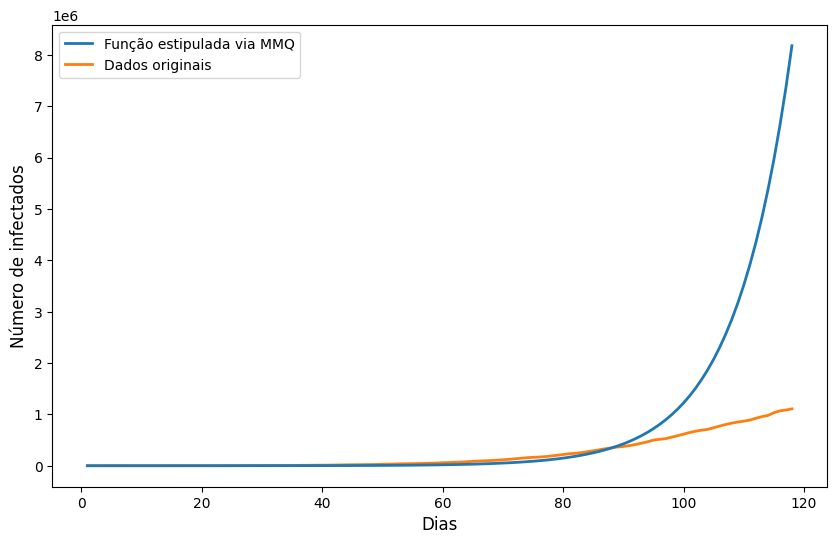

In [101]:
plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x, f(x), label = 'Função estipulada via MMQ',linewidth = 2,linestyle='-',zorder=2)
plt.plot(x, y, label = 'Dados originais',linewidth = 2,zorder=1)
# plt.plot(x, y, label = 'Interpolação de Newton',linewidth = 2,zorder=1)
# plt.scatter(x,y,label = 'Pontos',linewidth = 1,facecolor='red',zorder=3)
plt.xlabel('Dias',fontsize='large')
plt.ylabel('Número de infectados',fontsize='large')

plt.legend()
plt.show()

c. Repita o item b com os 20 primeiros dias

In [102]:
x_20 = x[:20]
y_20 = y[:20]
b, a = mmq_qr(x_20, np.log(y_20), 2) # Note que os coeficientes a e b estão invertidos

In [103]:
f_20 = lambda x: np.exp(a) * np.exp(b)**x

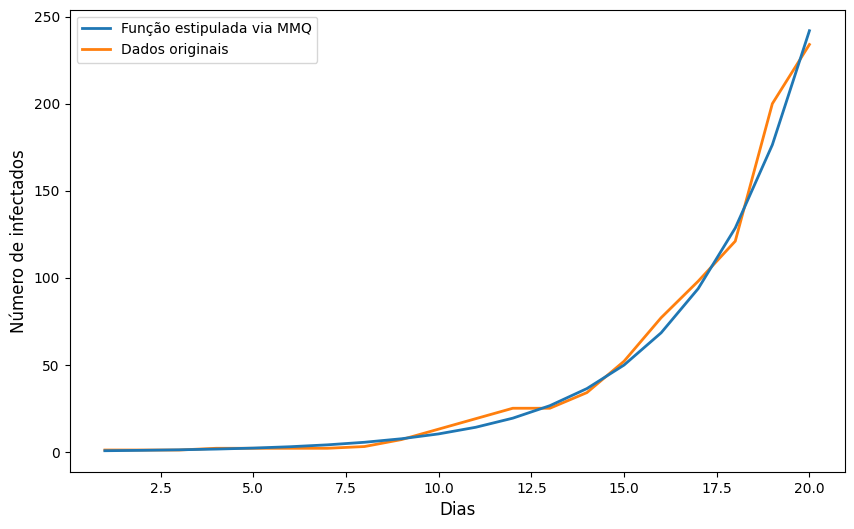

In [104]:
plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x_20, f_20(x_20), label = 'Função estipulada via MMQ',linewidth = 2,linestyle='-',zorder=2)
plt.plot(x_20, y_20, label = 'Dados originais',linewidth = 2,zorder=1)
# plt.plot(x, y, label = 'Interpolação de Newton',linewidth = 2,zorder=1)
# plt.scatter(x,y,label = 'Pontos',linewidth = 1,facecolor='red',zorder=3)
plt.xlabel('Dias',fontsize='large')
plt.ylabel('Número de infectados',fontsize='large')

plt.legend()
plt.show()

d. Repita o item b. com os últimos 50 dias

In [105]:
x_50 = x[50:]
y_50 = y[50:]
b, a = mmq_qr(x_50, np.log(y_50), 2) # Note que os coeficientes a e b estão invertidos

In [106]:
f_50 = lambda x: np.exp(a) * np.exp(b)**x

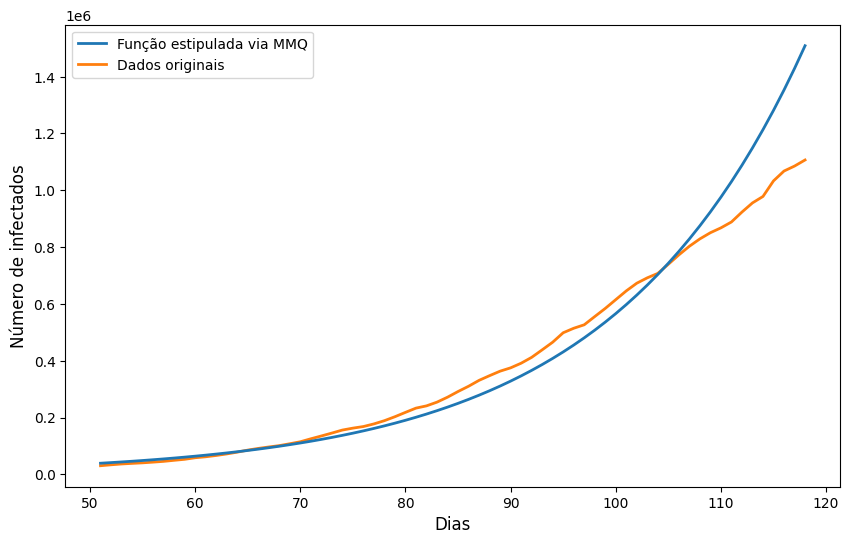

In [107]:
plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x_50, f_50(x_50), label = 'Função estipulada via MMQ',linewidth = 2,linestyle='-',zorder=2)
plt.plot(x_50, y_50, label = 'Dados originais',linewidth = 2,zorder=1)
# plt.plot(x, y, label = 'Interpolação de Newton',linewidth = 2,zorder=1)
# plt.scatter(x,y,label = 'Pontos',linewidth = 1,facecolor='red',zorder=3)
plt.xlabel('Dias',fontsize='large')
plt.ylabel('Número de infectados',fontsize='large')

plt.legend()
plt.show()

e. Comparar e analisar os gráficos obtidos

O gráfico mostra a evolucao dos casos de Covid no Brasil desde o primeiro infectado.

A curva com os dias completos mostra a tendência geral.
Ao analisar com mais profundidade, nos 20 primeiros dias podemos ver como os casos evoluiram sem medidas preventivas.

Já nos últimos 50 dias, com o apoio dos governadores, foram tomadas medidas que pudessem achatar a curva, diminuindo o número diário de infectados